In [2]:
# City University CS612 T04 Project Team

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

In [4]:
# Read Maine Ice-Out Data Files from 2003 to 2019
MIO2003 = pd.read_csv('Maine_Ice_Out_2003.csv', index_col=["Year"])
MIO2004 = pd.read_csv('Maine_Ice_Out_2004.csv', index_col=["Year"])
MIO2005 = pd.read_csv('Maine_Ice_Out_2005.csv', index_col=["Year"])
MIO2006 = pd.read_csv('Maine_Ice_Out_2006.csv', index_col=["Year"])
MIO2007 = pd.read_csv('Maine_Ice_Out_2007.csv', index_col=["Year"])
MIO2008 = pd.read_csv('Maine_Ice_Out_2008.csv', index_col=["Year"])
MIO2009 = pd.read_csv('Maine_Ice_Out_2009.csv', index_col=["Year"])
MIO2010 = pd.read_csv('Maine_Ice_Out_2010.csv', index_col=["Year"])
MIO2011 = pd.read_csv('Maine_Ice_Out_2011.csv', index_col=["Year"])
MIO2012 = pd.read_csv('Maine_Ice_Out_2012.csv', index_col=["Year"])
MIO2013 = pd.read_csv('Maine_Ice_Out_2013.csv', index_col=["Year"])
MIO2014 = pd.read_csv('Maine_Ice_Out_2014.csv', index_col=["Year"])
MIO2015 = pd.read_csv('Maine_Ice_Out_2015.csv', index_col=["Year"])
MIO2016 = pd.read_csv('Maine_Ice_Out_2016.csv', index_col=["Year"])
MIO2017 = pd.read_csv('Maine_Ice_Out_2017.csv', index_col=["Year"])
MIO2018 = pd.read_csv('Maine_Ice_Out_2018.csv', index_col=["Year"])
MIO2019 = pd.read_csv('Maine_Ice_Out_2019.csv', index_col=["Year"])

In [5]:
# Combine dataframes into one called "df"

df = pd.concat([MIO2003, MIO2004, MIO2005, MIO2006, MIO2007, MIO2008, MIO2009, MIO2010, MIO2011, MIO2012, 
               MIO2013, MIO2014, MIO2015, MIO2016, MIO2017, MIO2018, MIO2019])
df

,Lake_Name,Town,Ice_Out
Year,,,
2003,Big Wood Pond,Jackman,5/3/2003
2003,China Lake,China,4/22/2003
2003,Cobbossee Lake,Winthrop,4/22/2003
2003,Crystal Lake,Gray,4/21/2003
2003,Damariscotta Lake,Jefferson,4/16/2003
...,...,...,...
2019,Whittier Pond,Vienna,4/22/2019
2019,Wilson Lake,Wilton,5/2/2019
2019,Wilson Pond,Wilton,5/2/2019


In [6]:
# function to convert date to Julian day
# Reference: https://rafatieppo.github.io/post/2018_12_01_juliandate/
def convert(date):
    fmt = '%m/%d/%Y'
    date = datetime.datetime.strptime(date,fmt)
    date = date.timetuple()
    jdate = date.tm_yday
    return(jdate)

In [7]:
# add column to each dataframe to calculate the Julian Ice Out Date
df['JDate'] = df['Ice_Out'].apply(lambda x: convert(x))
df

,Lake_Name,Town,Ice_Out,JDate
Year,,,,
2003,Big Wood Pond,Jackman,5/3/2003,123
2003,China Lake,China,4/22/2003,112
2003,Cobbossee Lake,Winthrop,4/22/2003,112
2003,Crystal Lake,Gray,4/21/2003,111
2003,Damariscotta Lake,Jefferson,4/16/2003,106
...,...,...,...,...
2019,Whittier Pond,Vienna,4/22/2019,112
2019,Wilson Lake,Wilton,5/2/2019,122
2019,Wilson Pond,Wilton,5/2/2019,122


In [8]:
df2 = df.groupby('Year')['JDate'].describe()
df2

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2003,53.0,116.320755,6.354204,106.0,112.0,115.0,120.00,130.0
2004,35.0,109.885714,5.619145,103.0,106.0,108.0,111.50,123.0
2005,46.0,108.326087,7.220509,98.0,103.0,107.0,111.00,127.0
2006,46.0,91.065217,9.532173,77.0,86.0,89.5,92.75,118.0
2007,61.0,116.131148,6.181897,104.0,113.0,114.0,117.00,136.0
2008,65.0,114.861538,6.272153,108.0,110.0,114.0,118.00,130.0
2009,70.0,105.071429,5.804350,95.0,101.0,103.0,107.00,119.0
2010,66.0,85.242424,11.865996,62.0,79.0,81.5,85.00,116.0
2011,96.0,110.458333,7.406848,99.0,105.0,108.0,113.00,129.0


Text(0.5, 1.0, 'Maine Ice-Out Julian Dates')

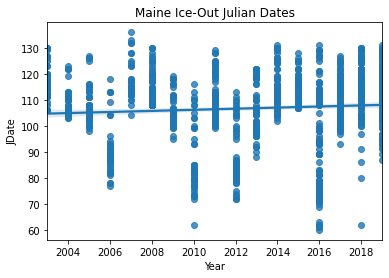

In [10]:
sb.regplot(df.index, 'JDate', data=df)
plt.title('Maine Ice-Out Julian Dates')

Text(0.5, 1.0, 'Mean Maine Ice-Out Julian Dates')

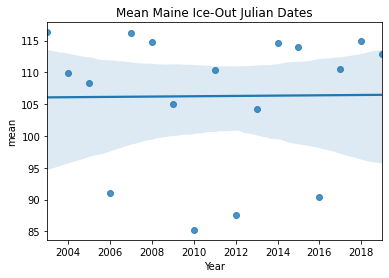

In [11]:
sb.regplot(df2.index, 'mean', data=df2)
plt.title('Mean Maine Ice-Out Julian Dates')

In [14]:
df3 = df2['mean']
df3

Year
2003    116.320755
2004    109.885714
2005    108.326087
2006     91.065217
2007    116.131148
2008    114.861538
2009    105.071429
2010     85.242424
2011    110.458333
2012     87.607595
2013    104.276316
2014    114.677778
2015    113.988889
2016     90.479339
2017    110.510949
2018    114.937008
2019    112.951389
Name: mean, dtype: float64

Text(0, 0.5, 'Mean JDate')

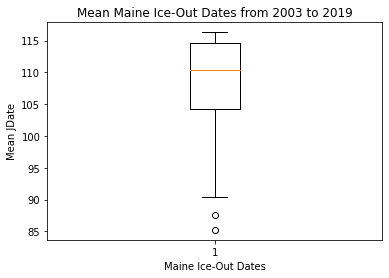

In [17]:
# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df3)

# X-Axis Label
#ax.set_xticklabels(['Mean JDates'])

# Graph Titles
ax.set_title('Mean Maine Ice-Out Dates from 2003 to 2019')
ax.set_xlabel('Maine Ice-Out Dates')
ax.set_ylabel('Mean JDate')

In [18]:
df3.describe()

count     17.000000
mean     106.281877
std       10.756733
min       85.242424
25%      104.276316
50%      110.458333
75%      114.677778
max      116.320755
Name: mean, dtype: float64